# Flight Fare Prediction

## Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

In [39]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Reading the dataset
import pandas as pd
import numpy as np
FlightFareData=pd.read_excel('D:/ML AI/Flight Fare Data/Data_Train.xlsx', encoding='latin')
print('Shape before deleting duplicate values:', FlightFareData.shape)

# Removing duplicate rows if any
FlightFareData=FlightFareData.drop_duplicates()
print('Shape After deleting duplicate values:', FlightFareData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
FlightFareData.head()

Shape before deleting duplicate values: (10683, 11)
Shape After deleting duplicate values: (10463, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Defining the problem statement: 
#### Create a ML model which can predict fare of a flight ticket
* Target Variable: Price

## Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a <b>supervised ML Regression model</b>, as the target variable is Continuous.

## Looking at the distribution of Target variable

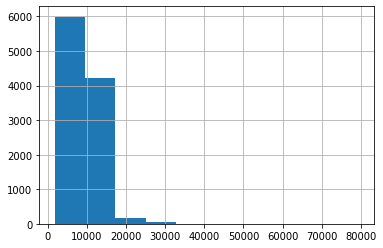

In [41]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
FlightFareData['Price'].hist()

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

In [42]:
# Looking at sample rows in the data
FlightFareData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [43]:
# Observing the summarized information of data
FlightFareData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [44]:
# Looking at the descriptive statistics of the data
FlightFareData.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10463,10463,10463,10463,10462,10463,10463,10463,10462,10463,10463.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3700,490,4346,4346,2376,233,412,544,5625,8183,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9026.642454
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4624.653227
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5224.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8266.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12343.500000


In [45]:
# Finding unique values for each column
FlightFareData.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

## Feature Engineering
* Many columns in this data require feature engineering to get properly utilised.

In [46]:
# The date and month is extracted from the Date_of_Journey column. 
# Now, Journey_day and Journey_month will act as seperate features.  
FlightFareData["Journey_day"] = pd.to_datetime(FlightFareData['Date_of_Journey'], format="%d/%m/%Y").dt.day
FlightFareData["Journey_month"] = pd.to_datetime(FlightFareData["Date_of_Journey"], format = "%d/%m/%Y").dt.month

# Dropping the Date_of_Journey column from the dataset as it is of no use now.
FlightFareData.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [47]:
FlightFareData.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [48]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
FlightFareData["Dep_hour"] = pd.to_datetime(FlightFareData["Dep_Time"]).dt.hour

# Extracting Minutes
FlightFareData["Dep_min"] = pd.to_datetime(FlightFareData["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
FlightFareData.drop(["Dep_Time"], axis = 1, inplace = True)

FlightFareData.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [49]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
FlightFareData["Arrival_hour"] = pd.to_datetime(FlightFareData.Arrival_Time).dt.hour

# Extracting Minutes
FlightFareData["Arrival_min"] = pd.to_datetime(FlightFareData.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
FlightFareData.drop(["Arrival_Time"], axis = 1, inplace = True)

FlightFareData.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [50]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(FlightFareData["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [51]:
# Adding duration_hours and duration_mins list to train_data dataframe

FlightFareData["Duration_hours"] = duration_hours
FlightFareData["Duration_mins"] = duration_mins

FlightFareData.drop(["Duration"], axis = 1, inplace = True)

FlightFareData.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [52]:
FlightFareData["Additional_Info"].value_counts()

No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [53]:
# Additional_Info contains almost 80% no_info. Therefore dropped.
# Route and Total_Stops are related to each other. Therefore, we are using only Total_stops as a feature and dropping Route

FlightFareData.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
FlightFareData.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


## Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots


In [54]:
# Plotting multiple bar charts at once for categorical variables
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

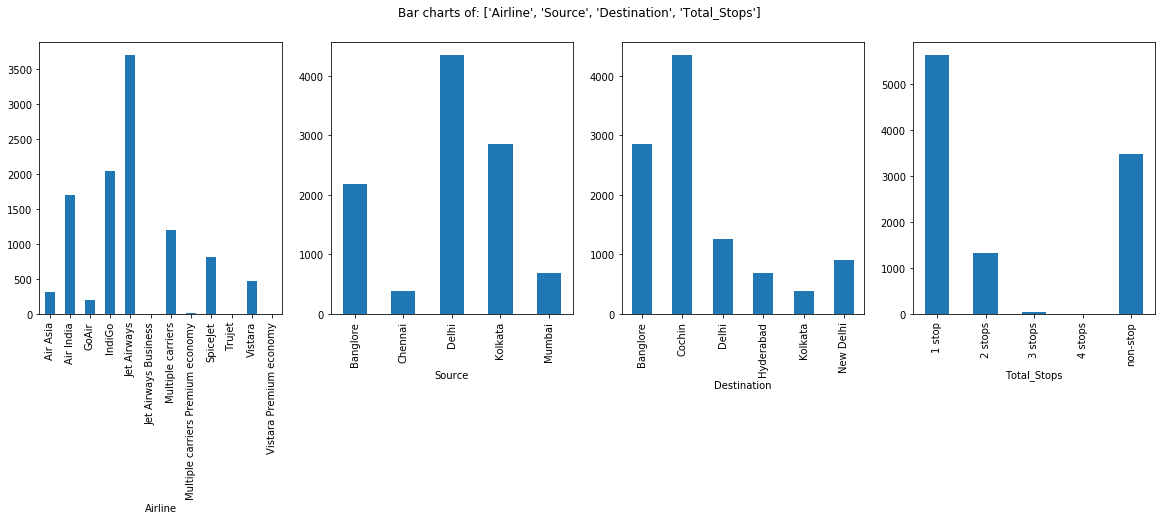

In [55]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=FlightFareData, colsToPlot=['Airline', 'Source', 'Destination', 'Total_Stops'])

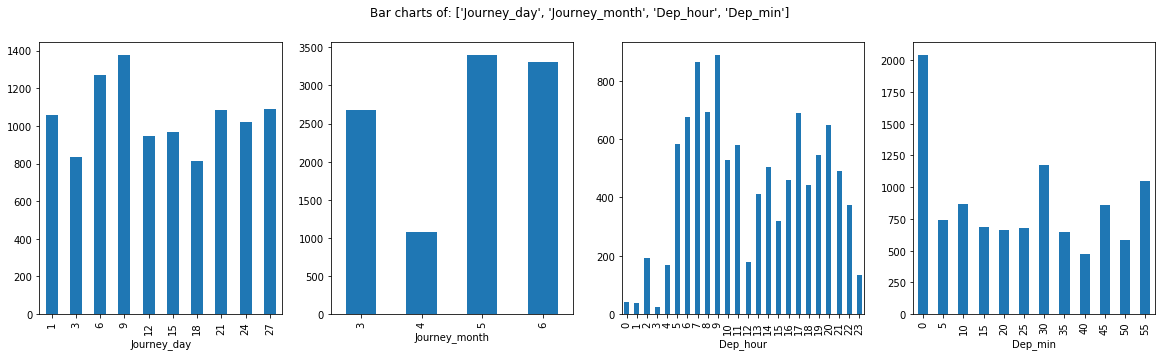

In [56]:
PlotBarCharts(inpData=FlightFareData, colsToPlot=['Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min'])

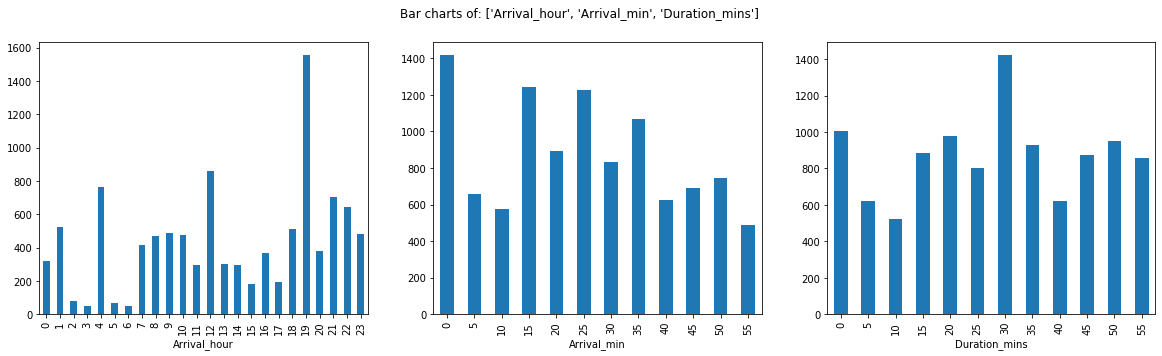

In [57]:
PlotBarCharts(inpData=FlightFareData, colsToPlot=['Arrival_hour', 'Arrival_min','Duration_mins'])

### Bar Charts Interpretation
* Most of the variables have good distribution of data. Hence, we will consider all the variables for further analysis.

### Visualize distribution of all the Continuous Predictor variables in the data using histograms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B71D202E88>]],
      dtype=object)

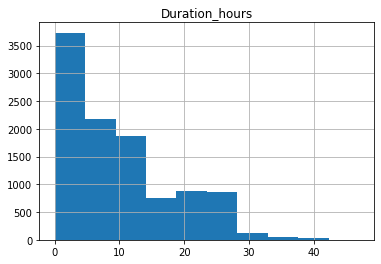

In [58]:
# Plotting histograms of Quantitative predictor
FlightFareData.hist('Duration_hours', figsize=(6,4))

### Histogram Interpretation
* Duration_hours is selected for further analysis as distribution is good

## Missing values treatment


In [59]:
# Finding how many missing values are there for each column
FlightFareData.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       1
Price             0
Journey_day       0
Journey_month     0
Dep_hour          0
Dep_min           0
Arrival_hour      0
Arrival_min       0
Duration_hours    0
Duration_mins     0
dtype: int64

In [60]:
# Dropping the rows having missing values
FlightFareData.dropna(inplace = True)
FlightFareData.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Journey_day       0
Journey_month     0
Dep_hour          0
Dep_min           0
Arrival_hour      0
Arrival_min       0
Duration_hours    0
Duration_mins     0
dtype: int64

## Feature Selection
### Relationship exploration: Continuous Vs Continuous -- Scatter Charts


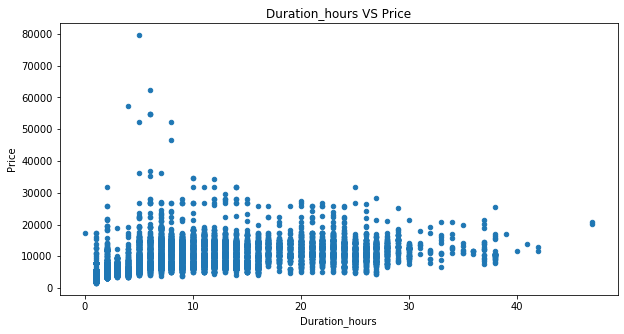

In [61]:
FlightFareData.plot.scatter(x='Duration_hours', y='Price', figsize=(10,5), title='Duration_hours'+" VS "+ 'Price')

### Statistical Feature Selection (Continuous Vs Continuous) using Correlation value


In [62]:
ContinuousCols=['Price','Duration_hours']
FlightFareData[ContinuousCols].corr()


,Price,Duration_hours
Price,1.0000,0.5042
Duration_hours,0.5042,1.0000


* Correlation Coefficient is 0.5. Hence, Duration_hours is selected as a feature

### Relationship exploration: Categorical Vs Continuous -- Box Plots


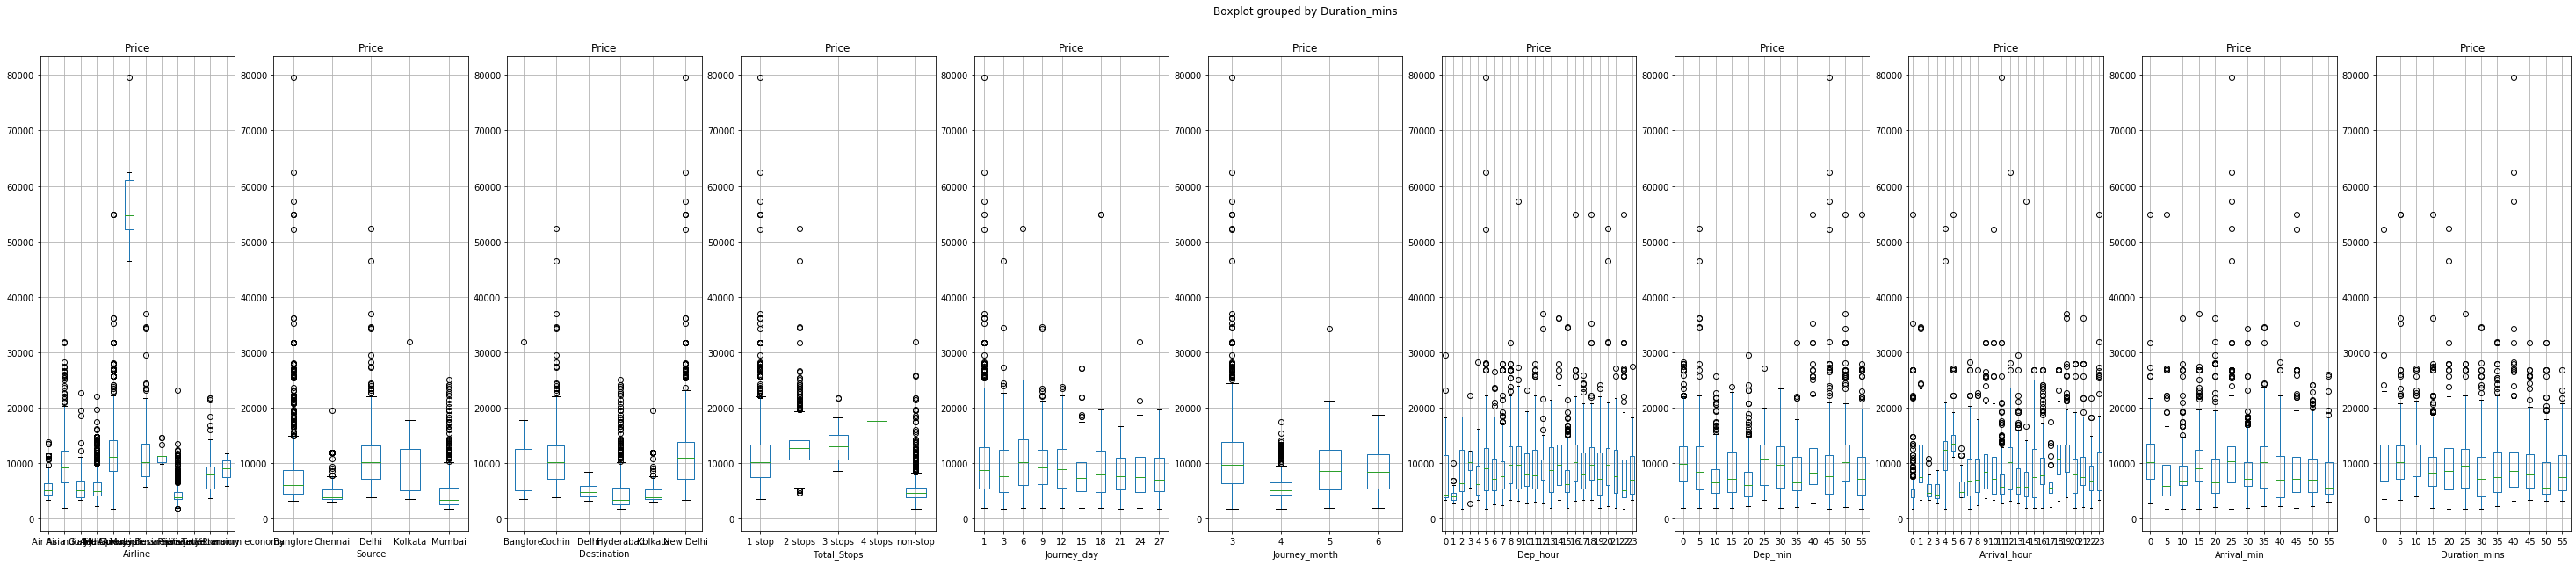

In [63]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['Airline', 'Source', 'Destination', 'Total_Stops','Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min','Arrival_hour', 'Arrival_min','Duration_mins']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    FlightFareData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test


In [64]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [65]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Airline', 'Source', 'Destination', 'Total_Stops','Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min','Arrival_hour', 'Arrival_min','Duration_mins']
FunctionAnova(inpData=FlightFareData, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Airline is correlated with Price | P-Value: 0.0
Source is correlated with Price | P-Value: 5.8578974186e-313
Destination is correlated with Price | P-Value: 0.0
Total_Stops is correlated with Price | P-Value: 0.0
Journey_day is correlated with Price | P-Value: 2.7180543281926365e-75
Journey_month is correlated with Price | P-Value: 5.075328804806241e-203
Dep_hour is correlated with Price | P-Value: 1.0781122205227944e-55
Dep_min is correlated with Price | P-Value: 1.1824011858995626e-114
Arrival_hour is correlated with Price | P-Value: 2.6366616393231596e-290
Arrival_min is correlated with Price | P-Value: 1.1445750158651036e-115
Duration_mins is correlated with Price | P-Value: 3.4282704313591604e-77


['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_mins']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable.

## Converting the binary nominal variable to numeric using mapping

In [66]:
FlightFareData['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)
FlightFareData.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


## Converting the nominal variable to numeric using get_dummies()

In [67]:
# Treating all the nominal variables at once using dummy variables
FlightFareDataFinal=pd.get_dummies(FlightFareData)
FlightFareDataFinal.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [68]:
FlightFareDataFinal.shape

(10462, 33)

In [69]:
# Saving this final data which we will use in ML
FlightFareDataFinal.to_pickle('FlightFareDataFinal.pkl')
import os
os.getcwd()

'C:\\Users\\anann\\Flight Price Prediction Project'

# Test Dataset

### Same preprocessing steps are followed for test dataset as well

In [70]:
test_data = pd.read_excel('D:/ML AI/Flight Fare Data/Test_set.xlsx', encoding='latin')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [71]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())


print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Treating all the nominal variables at once using dummy variables
TestDataFinal=pd.get_dummies(test_data)
TestDataFinal.head()

print("Shape of test data : ", TestDataFinal.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           

In [72]:
TestDataFinal.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,...,0,0,0,0,0,0,1,0,0,0
